In [5]:
import pandas as pd
#import SeisBlast as sb
import matplotlib.pyplot as plt
import numpy as np
import pygmt
seisblast_files = '/home/bmelo/bin/SeisBlast/files/'
pygmt.config(FONT="12p", 
             FONT_ANNOT_SECONDARY="10p", 
             FONT_LABEL="10p",
             IO_SEGMENT_MARKER="<<<")
pygmt.config(MAP_FRAME_TYPE = 'plain')

In [2]:
ray_info = pd.read_pickle(seisblast_files+"ray_path_data.pkl")

 ~~ plot ray all paths in cross-section view


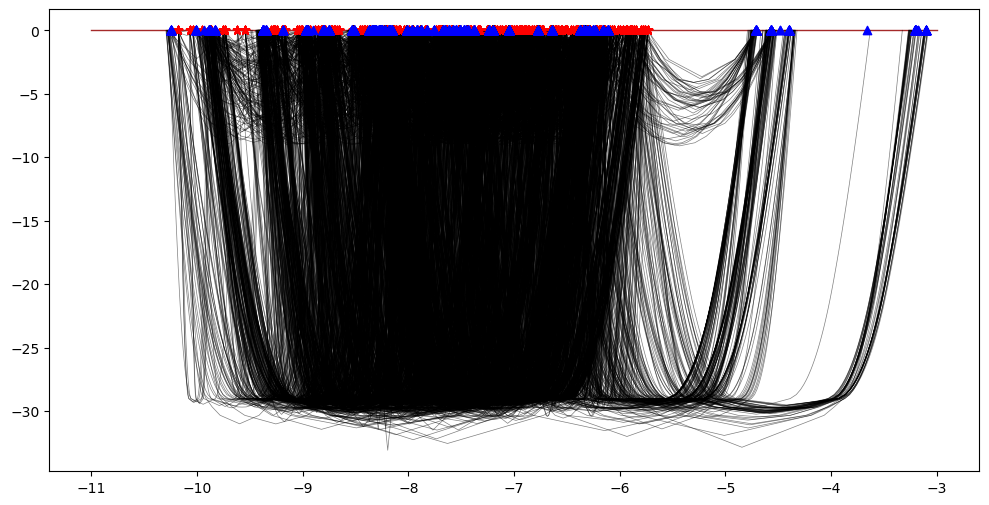

In [12]:
# # ---- Main Plot ----
type="cross-section" # 'map' or 'cross-section'
region=[-11, -5, 51, 56]

if type == 'map':
    print(' ~~ plot ray paths on geographical map')    
    ax = pygmt.Figure()
    # Combine all ray paths into a single dataset for efficient plotting
    all_lons = np.concatenate(ray_info['lon'].values)
    all_lats = np.concatenate(ray_info['lat'].values)
    
    # Create a density grid using numpy.histogram2d
    density, lon_edges, lat_edges = np.histogram2d(
        all_lons, all_lats, bins=[100,100], range=[[region[0], region[1]], [region[2], region[3]]]
    )
    # Convert the density grid to a pygmt-compatible grid
    lon_centers = 0.5 * (lon_edges[:-1] + lon_edges[1:])
    lat_centers = 0.5 * (lat_edges[:-1] + lat_edges[1:])
    
    density_grid = pd.DataFrame({
        "lon": np.repeat(lon_centers, len(lat_centers)),
        "lat": np.tile(lat_centers, len(lon_centers)),
        "density": (density.T.ravel())#/density.max(),   #density is normalized?
    })
    
    grid = pygmt.xyz2grd(
        data=density_grid,
        region=region,
        spacing=(0.1)
    )
    
    # Plot the grid
    ax.basemap(region=region, frame=["EwSn","a1"], projection="M10c")
    pygmt.makecpt(cmap="cpt-city/cubhelix", series=[0,200], background=True, reverse=True)
    ax.grdimage(grid=grid, region=region,frame=["WSne"])
    ax.coast(shorelines=True, borders=1, resolution="h")
    #ax.plot(x=all_lons, y=all_lats, transparency=30, pen="0.1p,black")
    ax.plot(x=ray_info['station_lon'], y=ray_info['station_lat'], style="t0.3c", fill="yellow", pen="0.1p")
    ax.plot(x=ray_info['quarry_lon'], y=ray_info['quarry_lat'], style="s0.2c", fill="red", pen="0.1p")
    ax.colorbar(frame = ["a50f10","x+l#Raypaths"], position = "jBR+w5c/0.3c+h+o0.5/0.8")
    ax.text(x=-7.8, y=51.5, text="max:"+str(density.max()), font="10p,Helvetica,black")
    ax.show()
    ax.savefig(seisblast_files+"ray_path_map.png", dpi=300)
    
elif type == 'cross-section':
    print(' ~~ plot ray all paths in cross-section view')
    fig, ax = plt.subplots(figsize=(12, 6))
    for lon, depth in zip(ray_info['lon'], ray_info['depth']):
        ax.plot(lon, depth, color='k', alpha=0.5, linewidth=0.5)
    ax.scatter(ray_info['quarry_lon'], np.zeros(len(ray_info)), color='r', marker='*', label='Quarry', zorder=3)
    ax.scatter(ray_info['station_lon'], np.zeros(len(ray_info)), color='b', marker='^', label='Station', zorder=3)
    ax.plot([-11, -3], [0, 0], linewidth=1, color='brown', zorder=1)
    
else:
    print(' ~~ type not recognized!')


In [4]:
# source_depth = 0
# max_distance = 3  # in degrees

# # Get travel times for specific phases
# phases = ["P", "S", "PP"]
# distances = []
# times = {phase: [] for phase in phases}

# for distance in range(0, int(max_distance * 10) + 1):  # finer steps for smooth plots
#     dist_in_deg = distance / 10.0  # Convert steps to degrees
#     arrivals = model.get_ray_paths(
#         source_depth_in_km=source_depth, 
#         distance_in_degree=dist_in_deg, 
#         phase_list=phases
#     )
#     dist_in_km = degrees2kilometers(dist_in_deg)
#     distances.append(dist_in_km)
#     for phase in phases:
#         phase_arrival = [a.time for a in arrivals if a.name == phase]
#         if phase_arrival:
#             times[phase].append(phase_arrival[0])
#         else:
#             times[phase].append(None)  # No arrival for this phase at this distance

# # Plot manually
# fig, ax = plt.subplots(figsize=(6, 6))
# for phase, time_list in times.items():
#     ax.plot(
#         distances, 
#         time_list, 
#         label=phase, 
#         marker='o', 
#         linestyle='-', 
#         markersize=4
#     )

# # Customise the plot
# ax.set_xlim(0, degrees2kilometers(max_distance))
# ax.set_ylim(0, max([max(t) for t in times.values() if t]))
# ax.set_xlabel("Epicentral Distance (km)")
# ax.set_ylabel("Travel Time (seconds)")
# ax.legend()
# ax.grid(True)
# plt.show()
